This code detect crosswalk

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Read the image
image = cv2.imread('Crosswalk1.jpg') 
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Original Image')

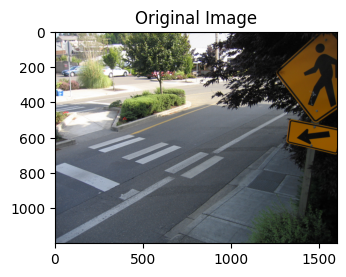

In [8]:
# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

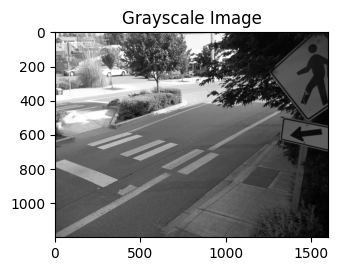

In [9]:
# Display the grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.tight_layout()
plt.show()

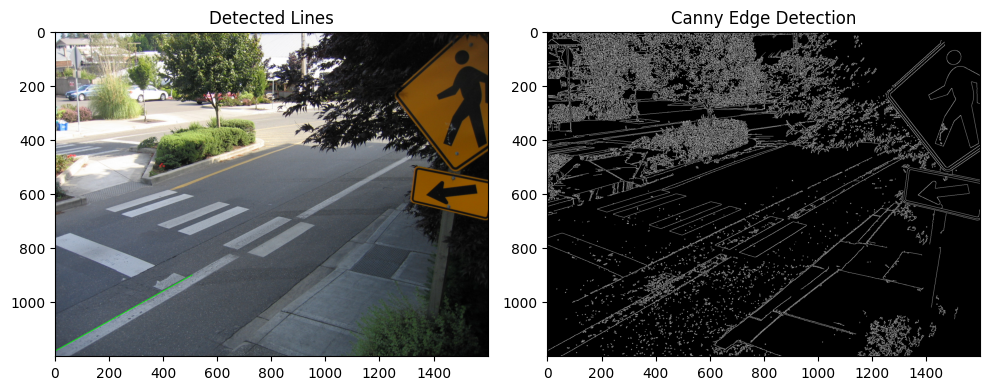

In [10]:
# Apply Canny edge detection
edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

# Apply Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=500, maxLineGap=10)

# Draw lines on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.tight_layout()
plt.show()

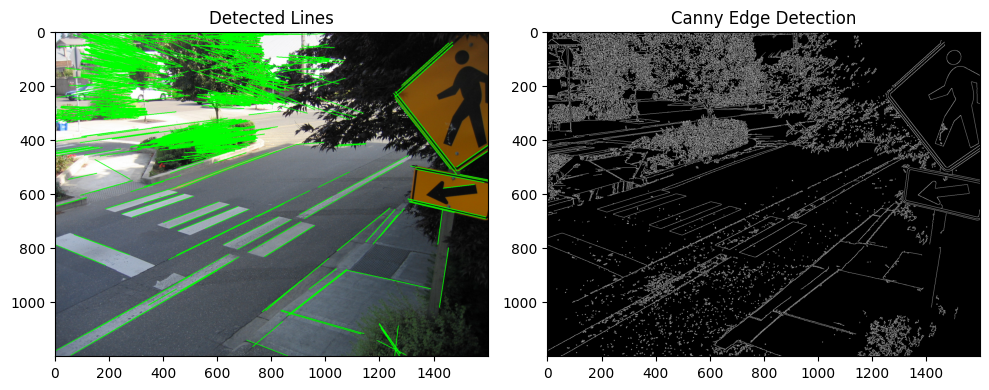

In [11]:
# Apply Canny edge detection
edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

# Apply Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)

# Draw lines on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.tight_layout()
plt.show()

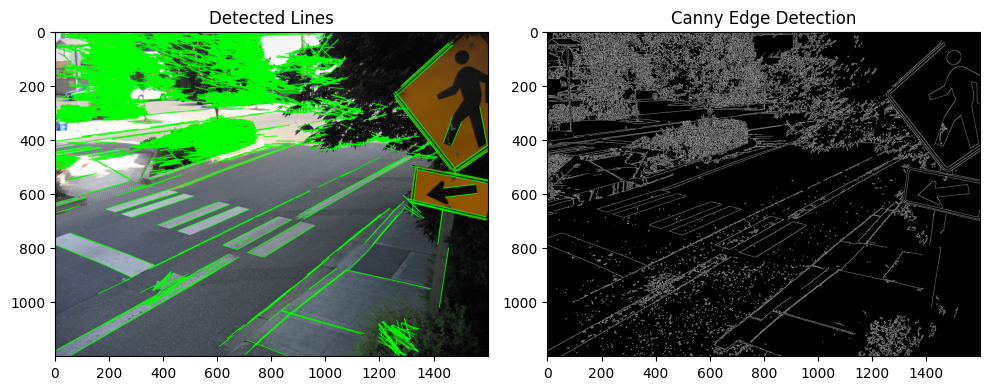

In [12]:
# Apply Canny edge detection
edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

# Apply Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=50, maxLineGap=10)

# Draw lines on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.tight_layout()
plt.show()

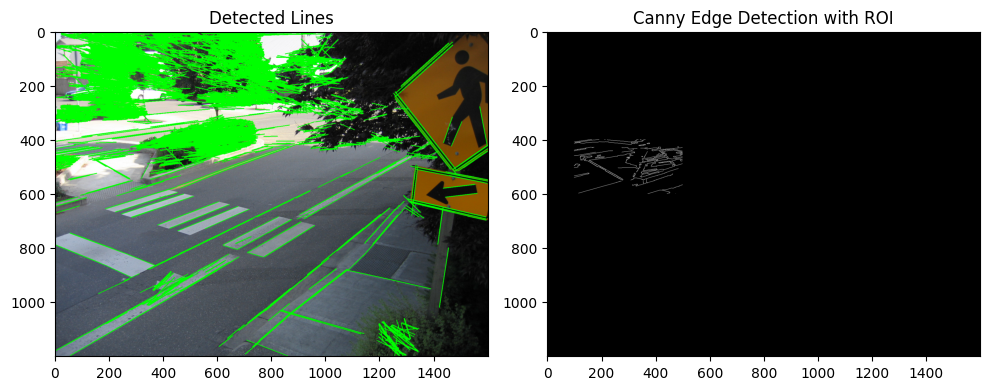

In [13]:
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Convert the image to grayscale
gray_image = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

# Define the region of interest (ROI) for the crosswalk (adjust coordinates based on your image)
mask = np.zeros_like(edges)
roi = np.array([[(100, 400), (500, 400), (500, 600), (100, 600)]], dtype=np.int32)
cv2.fillPoly(mask, roi, 255)
masked_edges = cv2.bitwise_and(edges, mask)

# Apply Hough Line Transform
lines = cv2.HoughLinesP(masked_edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)

# Draw lines on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')

plt.subplot(1, 2, 2)
plt.imshow(masked_edges, cmap='gray')
plt.title('Canny Edge Detection with ROI')

plt.tight_layout()
plt.show()